In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

In [173]:
dataset = pd.read_csv('driver-data.csv')

In [174]:
print (dataset.head())

           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25


In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [176]:
print (dataset.describe())

                 id  mean_dist_day  mean_over_speed_perc
count  4.000000e+03    4000.000000           4000.000000
mean   3.423312e+09      76.041523             10.721000
std    1.154845e+03      53.469563             13.708543
min    3.423310e+09      15.520000              0.000000
25%    3.423311e+09      45.247500              4.000000
50%    3.423312e+09      53.330000              6.000000
75%    3.423313e+09      65.632500              9.000000
max    3.423314e+09     244.790000            100.000000


In [177]:
labels=list()
for index, row in dataset.iterrows():
    # dist big,speed big
    if row['mean_dist_day']>=50 and row['mean_over_speed_perc']>=20:
        labels.append(1)
    # dist low,speed big
    elif row['mean_dist_day']<=50 and row['mean_over_speed_perc']>=20:
        labels.append(2)
    # dist high,speed low
    elif row['mean_dist_day']>=50 and row['mean_over_speed_perc']<=20:
        labels.append(3)
    # dist low,speed low
    else:
        labels.append(4)

In [178]:
len(labels)

4000

In [179]:
x = dataset.iloc[:,[1,2]].values

In [180]:
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size=0.20,random_state=0)

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

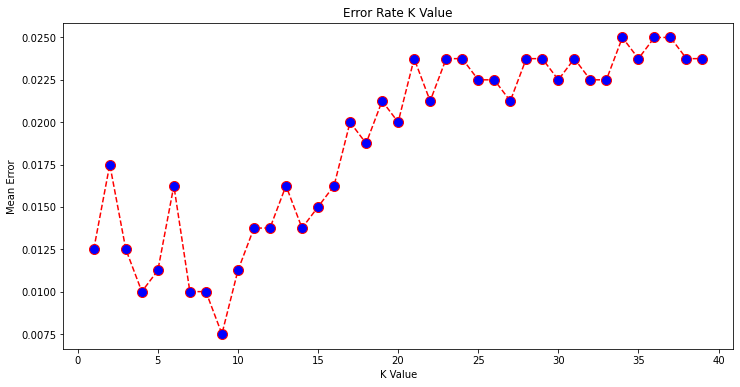

In [184]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [185]:
classifier = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [186]:
y_pred = classifier.predict(X_test)

In [187]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 73   0   2   0]
 [  3  36   0   0]
 [  0   0 421   1]
 [  0   0   0 264]]
              precision    recall  f1-score   support

           1       0.96      0.97      0.97        75
           2       1.00      0.92      0.96        39
           3       1.00      1.00      1.00       422
           4       1.00      1.00      1.00       264

    accuracy                           0.99       800
   macro avg       0.99      0.97      0.98       800
weighted avg       0.99      0.99      0.99       800

